# аугментации аудио

In [11]:
import cv2
import librosa
import random
import numpy as np
import os
import requests
from scipy.io import wavfile
from scipy.io.wavfile import write

# Helper function to download the video locally
def download_video(url, save_path='video.mp4'):
    response = requests.get(url, stream=True)
    with open(save_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                file.write(chunk)
    return save_path

# Augmentations
def pitch_shift(audio, sr, n_steps=2):
    return librosa.effects.pitch_shift(audio, sr, n_steps)

def time_stretch(audio, rate=1.25):
    return librosa.effects.time_stretch(audio, rate)

def time_stretch(audio, sr, rate=1.25):
    """
    Stretch or compress time in the audio without changing pitch.
    rate: Values greater than 1.0 speed up the audio, values less than 1.0 slow it down.
    sr: Sampling rate of the audio
    """
    # Convert audio to mel spectrogram
    audio_stft = librosa.stft(audio)
    stft_stretch = librosa.effects.time_stretch(audio_stft, rate)
    
    # Convert back to audio
    return librosa.istft(stft_stretch)

def add_noise(audio, noise_factor=0.005):
    # Generate noise with the same shape as the audio
    noise = np.random.randn(*audio.shape)  # Create noise with the same shape as audio
    augmented_audio = audio + noise_factor * noise
    return augmented_audio


def change_volume(audio, gain=1.1):
    return audio * gain

def low_pass_filter(audio, sr, cutoff=3000):
    return librosa.effects.preemphasis(audio, coef=0.95)

def high_pass_filter(audio, sr, cutoff=200):
    return librosa.effects.preemphasis(audio)

# Randomly apply augmentations to the audio
def apply_audio_augmentations(audio, sr):
    augmentations = [
        lambda x: pitch_shift(x, sr, n_steps=random.uniform(-1, 1)),
        lambda x: time_stretch(x, sr, rate=random.uniform(0.8, 1.2)),
        lambda x: add_noise(x, noise_factor=random.uniform(0.001, 0.01)),
        lambda x: change_volume(x, gain=random.uniform(0.9, 1.1)),
        lambda x: low_pass_filter(x, sr, cutoff=random.uniform(2000, 4000)),
        lambda x: high_pass_filter(x, sr, cutoff=random.uniform(100, 300))
    ]
    
    if random.random() < 0.5:
        audio = random.choice(augmentations)(audio)
    
    return audio

# Extract frames from video
def extract_frames(video_path, num_frames=96):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames-1, num_frames, dtype=int)
    
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)
    
    cap.release()
    return frames

# Extract audio from video
def extract_audio(video_path, duration=60):
    audio_path = video_path.replace(".mp4", ".wav")
    command = f"ffmpeg -i {video_path} -t {duration} -q:a 0 -map a {audio_path}"
    os.system(command)
    
    sr, audio = wavfile.read(audio_path)
    return audio, sr

# Main function to process video
def process_video(video_path):
    # Extract and augment audio only
    print("Extracting and augmenting audio from video...")
    audio, sr = extract_audio(video_path)  # Get audio and sampling rate (sr)
    augmented_audio = apply_audio_augmentations(audio, sr)
    return augmented_audio, sr

# Example usage: download the video first, then process it
video_url = "https://storage.yandexcloud.net/rutube-tagging/77fb221d8c1e75da78bf401f825daa23.mp4"
local_video_path = download_video(video_url, "downloaded_video.mp4")

# Process video to get augmented audio and sampling rate
output_audio, sr = process_video(local_video_path)

# Save the augmented audio as a new .wav file
augmented_audio_path = "augmented_audio.wav"
write(augmented_audio_path, sr, output_audio.astype(np.int16))  # Now sr is defined

print(f"Augmented audio saved to {augmented_audio_path}")

Extracting and augmenting audio from video...
Augmented audio saved to augmented_audio.wav


# Видео аугементация

In [20]:
import cv2
import librosa
import random
import numpy as np
import os
import requests
from scipy.io import wavfile

# Helper function to download the video locally
def download_video(url, save_path='video.mp4'):
    response = requests.get(url, stream=True)
    with open(save_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                file.write(chunk)
    return save_path

# Augmentations
def pitch_shift(audio, sr, n_steps=2):
    return librosa.effects.pitch_shift(audio, sr, n_steps=n_steps)

def time_stretch(audio, sr, rate=1.25):
    """
    Stretch or compress time in the audio without changing pitch.
    rate: Values greater than 1.0 speed up the audio, values less than 1.0 slow it down.
    sr: Sampling rate of the audio
    """
    # Convert audio to mel spectrogram
    audio_stft = librosa.stft(audio)
    stft_stretch = librosa.effects.time_stretch(audio_stft, rate)

    # Convert back to audio
    return librosa.istft(stft_stretch)

def add_noise(audio, noise_factor=0.005):
    noise = np.random.randn(len(audio))
    augmented_audio = audio + noise_factor * noise
    return augmented_audio

def change_volume(audio, gain=1.1):
    return audio * gain

def low_pass_filter(audio, sr, cutoff=3000):
    return librosa.effects.preemphasis(audio, coef=0.95)

def high_pass_filter(audio, sr, cutoff=200):
    return librosa.effects.preemphasis(audio)

# Randomly apply augmentations to the audio
def apply_audio_augmentations(audio, sr):
    augmentations = [
        lambda x: pitch_shift(x, sr, n_steps=random.uniform(-1, 1)),
        lambda x: time_stretch(x, sr, rate=random.uniform(0.8, 1.2)),
        lambda x: add_noise(x, noise_factor=random.uniform(0.001, 0.01)),
        lambda x: change_volume(x, gain=random.uniform(0.9, 1.1)),
        lambda x: low_pass_filter(x, sr, cutoff=random.uniform(2000, 4000)),
        lambda x: high_pass_filter(x, sr, cutoff=random.uniform(100, 300))
    ]

    if random.random() < 0.5:
        audio = random.choice(augmentations)(audio)

    return audio

# Extract frames from video
def extract_frames(video_path, num_frames=96):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames-1, num_frames, dtype=int)

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)

    cap.release()
    return frames

# Extract audio from video
def extract_audio(video_path, duration=60):
    audio_path = video_path.replace(".mp4", ".wav")
    command = f"ffmpeg -i {video_path} -t {duration} -q:a 0 -map a {audio_path}"
    os.system(command)

    sr, audio = wavfile.read(audio_path)
    return audio, sr

# Main function to process video
def process_video(video_path):
    print("Extracting frames from video...")
    frames = extract_frames(video_path)
    return frames

# Example usage: download the video first, then process it
video_url = "https://storage.yandexcloud.net/rutube-tagging/a3a5e23a53a4f295210d792456a39a16.mp4"
local_video_path = download_video(video_url, "downloaded_video.mp4")

# Process video to get augmented audio and sampling rate
output = process_video(local_video_path)

print(f"Extracted {len(output)} frames.")

Extracting frames from video...
Extracted 96 frames.


Смотрим результат

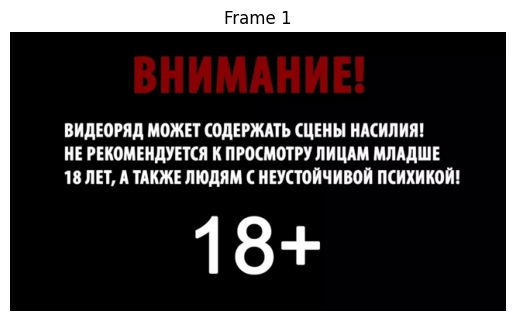

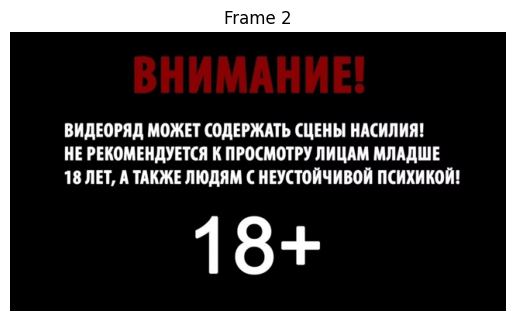

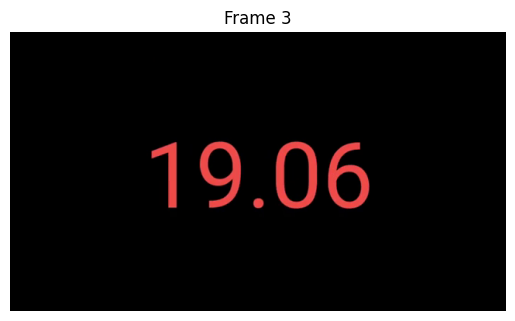

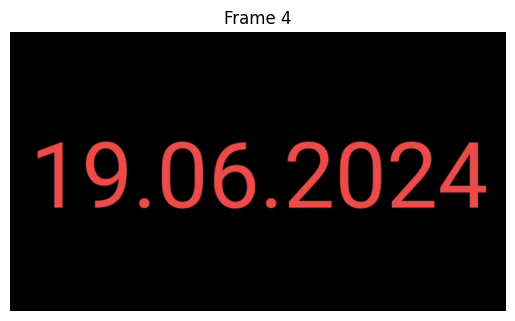

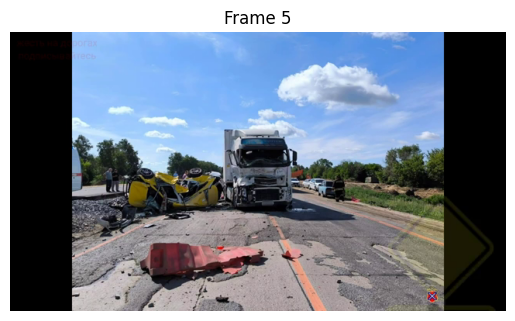

In [21]:
import matplotlib.pyplot as plt

# Display the first 5 frames as an example
for i in range(5):
    plt.imshow(cv2.cvtColor(output[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {i + 1}")
    plt.axis('off')
    plt.show()


Сохраняем все фото

In [22]:
import os

# Create a directory to save frames
output_dir = "extracted_frames"
os.makedirs(output_dir, exist_ok=True)

# Save frames as images
for idx, frame in enumerate(output):
    frame_path = os.path.join(output_dir, f"frame_{idx + 1}.jpg")
    cv2.imwrite(frame_path, frame)

print(f"Saved {len(output)} frames to {output_dir}")


Saved 96 frames to extracted_frames


Удаляем все фото

In [23]:
import os
import glob

# Укажите путь к папке с кадрами
folder_path = 'extracted_frames'

# Поиск всех файлов .jpg в папке
jpg_files = glob.glob(os.path.join(folder_path, '*.jpg'))

# Удаление найденных файлов
for jpg_file in jpg_files:
    try:
        os.remove(jpg_file)
        print(f"Удалён файл: {jpg_file}")
    except Exception as e:
        print(f"Ошибка при удалении {jpg_file}: {e}")

print("Удаление всех .jpg файлов завершено.")


Удалён файл: extracted_frames/frame_33.jpg
Удалён файл: extracted_frames/frame_91.jpg
Удалён файл: extracted_frames/frame_45.jpg
Удалён файл: extracted_frames/frame_11.jpg
Удалён файл: extracted_frames/frame_58.jpg
Удалён файл: extracted_frames/frame_80.jpg
Удалён файл: extracted_frames/frame_31.jpg
Удалён файл: extracted_frames/frame_5.jpg
Удалён файл: extracted_frames/frame_23.jpg
Удалён файл: extracted_frames/frame_53.jpg
Удалён файл: extracted_frames/frame_1.jpg
Удалён файл: extracted_frames/frame_70.jpg
Удалён файл: extracted_frames/frame_74.jpg
Удалён файл: extracted_frames/frame_37.jpg
Удалён файл: extracted_frames/frame_52.jpg
Удалён файл: extracted_frames/frame_3.jpg
Удалён файл: extracted_frames/frame_63.jpg
Удалён файл: extracted_frames/frame_20.jpg
Удалён файл: extracted_frames/frame_22.jpg
Удалён файл: extracted_frames/frame_89.jpg
Удалён файл: extracted_frames/frame_50.jpg
Удалён файл: extracted_frames/frame_60.jpg
Удалён файл: extracted_frames/frame_76.jpg
Удалён файл: e